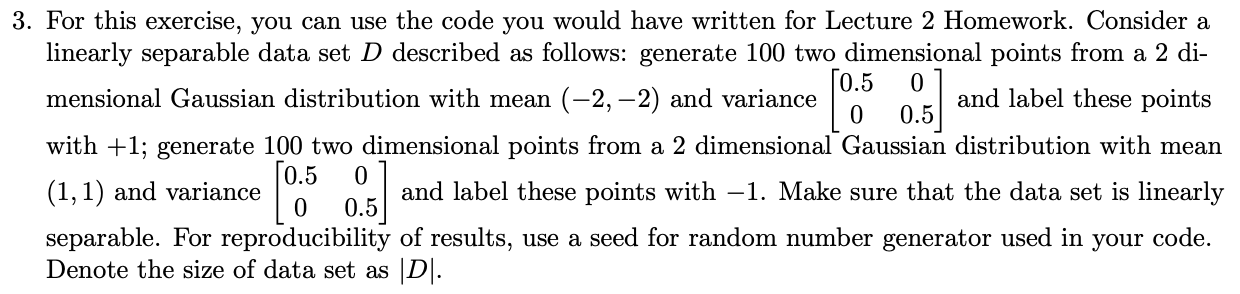

#Import required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
#seed random number generator of numpy for reproducibility
np.random.seed(1000)

#Data Generation

In [28]:
#Generate D_1
mean = [-2,-2] # mean of the gaussian distribution
cov = [[0.5,0], [0,0.5]] # covariance matrix
size = 100 # number of 2 dimensional points 

D_1 = np.random.multivariate_normal(mean, cov, size) # Input generation

y_1 = np.full((100,1),1) # Class = +1

D_1 = np.concatenate((D_1,y_1),1) # Augment

In [61]:
#Generate D_2
mean = [1,1] # mean of the gaussian distribution
cov = [[0.5,0], [0,0.5]] # covariance matrix
size = 100 # number of 2 dimensional points 

D_2 = np.random.multivariate_normal(mean, cov, size) # Input generation

y_2 = np.full((100,1),-1) # Class = -1

D_2 = np.concatenate((D_2,y_2),1) # Augment

In [62]:
#Construct D and shuffle.
D = np.concatenate((D_1,D_2), axis = 0)
np.random.shuffle(D)

#Data Visualization

In [63]:
def plot_data(data):
  #write code to plot the data points. Use different colors for different classes.
  plt.scatter(data[:,0], data[:,1], c=data[:,2], s=30, cmap='RdBu')

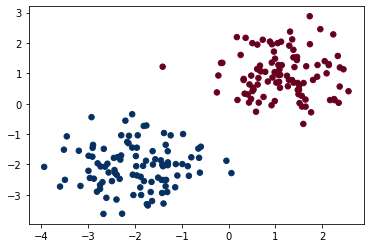

In [64]:
plot_data(D)

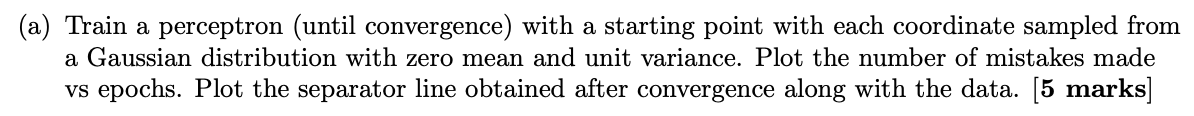

In [15]:
# Computing the prediction for the example x using weight w
def perceptron_prediction(w, x):
    prediction = 0
    if(np.dot(w,x)>=0):
      prediction = 1
    else:
      prediction = -1
    return prediction

In [16]:
# Function to update weights 
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    if(y_pred!=y):
      is_mistake = True
    #and write code to update the weights in perceptron 
    if(is_mistake):
      w = w + y*x
    return w, is_mistake

#Training procedure for perceptron

In [17]:
def train_perceptron(data):
    # Initialize the starting point such that it is two-dimensional with each coordinate sampled from a Gaussian distribution with zero mean and unit variance
    w1 = np.random.normal(0, 1)
    w2 = np.random.normal(0, 1)
    w = np.array([w1, w2])

    w0 = np.array([1])
    w = np.concatenate((w,w0),0)

    epochs=0 # useful for executing multiple passes over a finite data set
    max_epochs = 100 
    num_mistakes = 1 # some dummy value for number of mistakes so as to run the while loop for at least one time
    l = list()

    while num_mistakes!=0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            # retrieve the feature vector x from data set D 
            x = data[i,0:2]
            one = np.array([1])
            x = np.concatenate((x,one), 0)

            # find the prediction of the perceptron on this feature vector x 
            y_hat = perceptron_prediction(w, x)
            
            # retrieve the label y for x from data set D 
            y = data[i,2]
            
            # update the weights if the prediction made != ground truth value
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            
            # if a mistake has been made by the perceptron on x then we increment the count of number of mistakes made by perceptron on all the feature vectors in D
            if is_mistake:
              num_mistakes += 1
            
        # increment the count of epochs
        l.append([epochs, num_mistakes])
        epochs=epochs+1
    return w, l

#Plotting the separating line

In [18]:
def plot_data_with_separator(data, w):
  #write required code. (You can reuse the code written for plotting the data points.)
  plt.figure()
  plt.scatter(data[:,0], data[:,1], c=data[:,2], s=10, cmap='RdBu')

  w0 = w[2]
  w1 = w[0]
  w2 = w[1]
  
  x = np.linspace(-4,4,100)
  y = (-1)*(w0/w2) - (w1/w2)*x

  plt.plot(x, y, '-r')
  pass

#Plotting the number of mistakes vs epochs



In [19]:
def plot_mistakes_vs_epochs(l):
  #write required code. (You can reuse the code written for plotting the data points.)
  plt.figure()
  x=[]
  y=[]
  for i in range(len(l)):
    z = l[i]
    x.append(z[0])
    y.append(z[1])

  plt.plot(x, y, '-r')
  pass

#Calling the Perceptron train function.

In [65]:
w_final, l = train_perceptron(D)

#Calling the plot function to plot separator

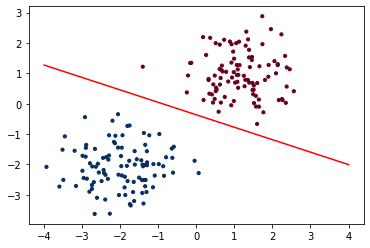

In [66]:
plot_data_with_separator(D, w_final)

#Calling the plot function to plot number of mistakes v/s epochs

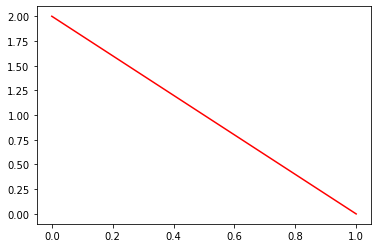

In [67]:
plot_mistakes_vs_epochs(l)

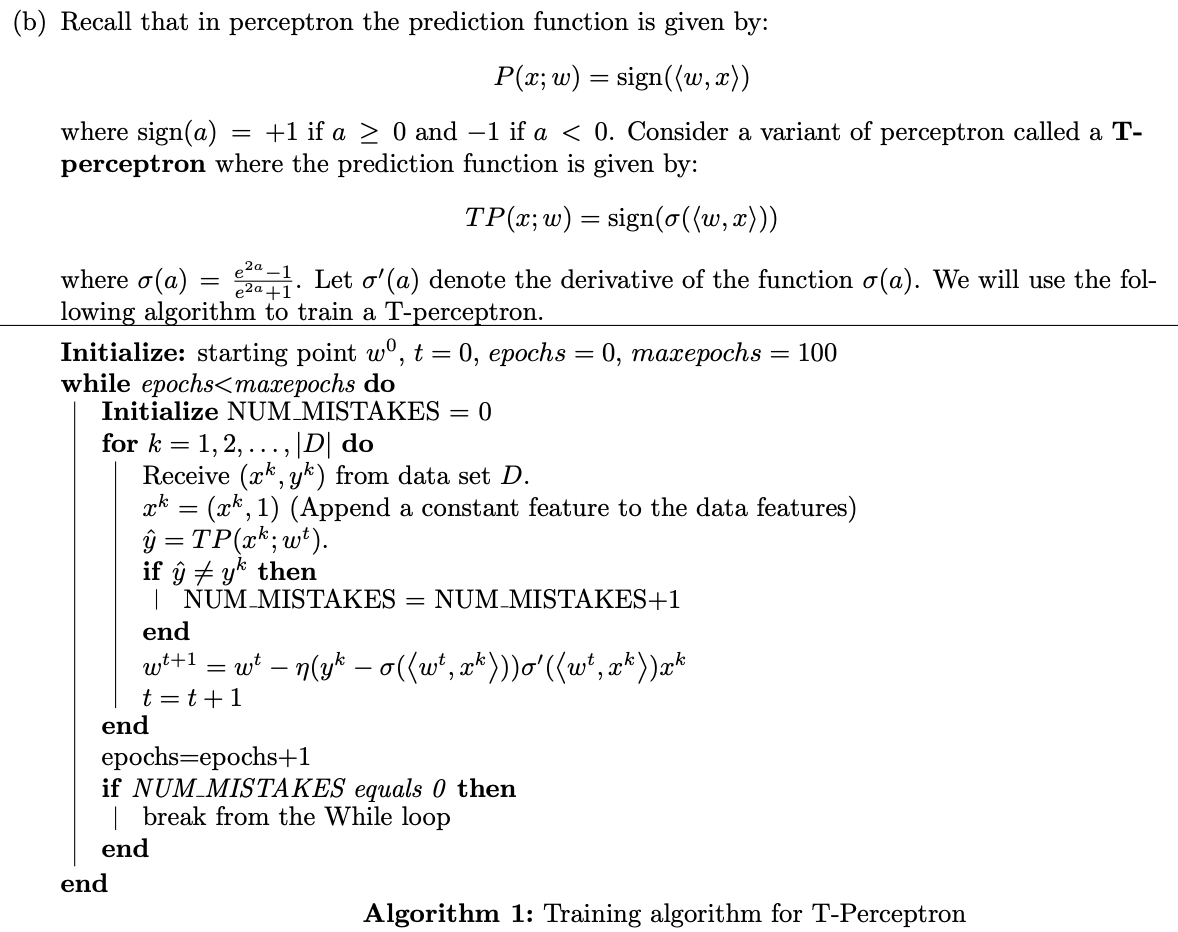

In [24]:
def sigma(a):
  return (math.exp(2*a)-1)/(math.exp(2*a)+1)

def sigma_prime(a):
  return (4*math.exp(2*a))/(math.exp(2*a)+1)**2

def Tperceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    prediction = 0
    if(sigma(np.dot(w,x))>=0):
      prediction = 1
    else:
      prediction = -1
    return prediction

def Tperceptron_update_weights(y, y_hat, neta, x, w):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    if(y_hat!=y):
      is_mistake = True
    w = w + neta*(y-sigma(np.dot(w,x)))*sigma_prime(np.dot(w,x))*x
    #and write code to update the weights in perceptron 
    return w, is_mistake

In [25]:
def train_T_perceptron(data, neta):
  w0 = np.random.normal(0, 1)
  w1 = np.random.normal(0, 1)
  w2 = np.random.normal(0, 1)
  w = np.array([w0, w1, w2])

  # w0 = np.array([1])
  # w = np.concatenate((w,w0),0)

  epochs=0 # useful for executing multiple passes over a finite data set
  max_epochs = 100 
  l = list()

  while epochs < max_epochs:
    num_mistakes = 0
    for i in range(len(data)):
      # receive feature vector x from data set D
      x = data[i,0:2]
      one = np.array([1])
      x = np.concatenate((x,one), 0)

      # find the Tprediction of the perceptron on the feature vector x
      y_hat = Tperceptron_prediction(w, x)

      # extract the label of the feature vector x from data set D
      y = data[i,2]

      w, is_mistake = Tperceptron_update_weights(y, y_hat, neta, x, w)

      if is_mistake:
        num_mistakes += 1

    l.append([epochs, num_mistakes])
    epochs+=1
    if num_mistakes == 0:
      break
  return w, l

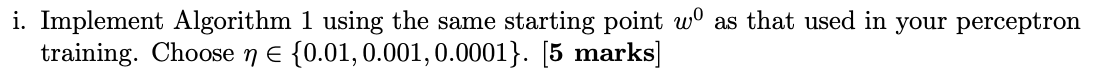

In [68]:
# T-perceptron training using different values of η
w1, l1 = train_T_perceptron(D, 0.01)
w2, l2 = train_T_perceptron(D, 0.001)
w3, l3 = train_T_perceptron(D, 0.0001)

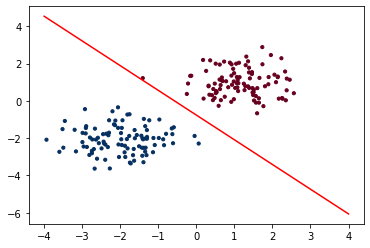

In [69]:
plot_data_with_separator(D, w1)

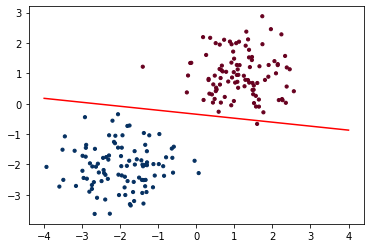

In [70]:
plot_data_with_separator(D, w2)

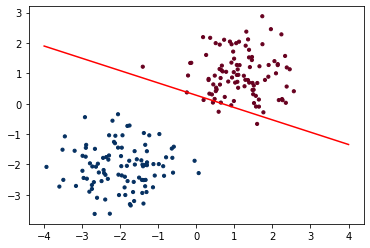

In [71]:
plot_data_with_separator(D, w3)

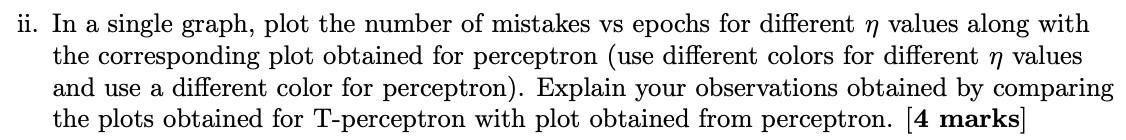

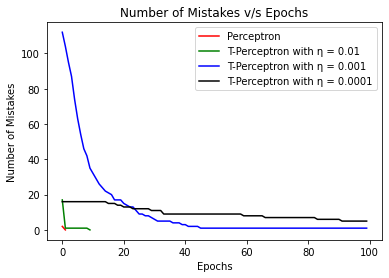

In [72]:
plt.figure()

a=[]
b=[]
a1=[]
b1=[]
a2=[]
b2=[]
a3=[]
b3=[]

for i in range(len(l)):
  c = l[i]
  a.append(c[0])
  b.append(c[1])

for i in range(len(l1)):
  c1 = l1[i]
  a1.append(c1[0])
  b1.append(c1[1])

for i in range(len(l2)):
  c2 = l2[i]
  a2.append(c2[0])
  b2.append(c2[1])

for i in range(len(l3)):
  c3= l3[i]
  a3.append(c3[0])
  b3.append(c3[1])

plt.plot(a, b, '-r', label='Perceptron')
plt.plot(a1, b1, '-g', label='T-Perceptron with η = 0.01')
plt.plot(a2, b2, '-b', label='T-Perceptron with η = 0.001')
plt.plot(a3, b3, 'black', label='T-Perceptron with η = 0.0001')

plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.title("Number of Mistakes v/s Epochs")
  
plt.legend()
  
plt.show()

# The observations that can be noted from the following plot:
# (i) The perceptron takes the least number of epochs to converge. Clearly, the perceptron learns faster than the T-perceptrons. It is the first to "make no wrong predictions (mistakes) in a round".
# (ii) The T-perceptrons on the other hand, owning to their passive update rule, learn slowly and hence they converge much later with the rate of converge being directly proportional to the value of neta. This tells us that neta is some kind of an indicator for the learning rate => Higher the value of neta, higher is the learning rate.

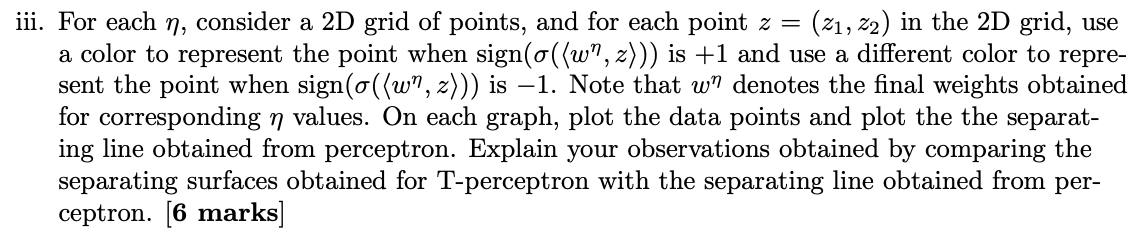

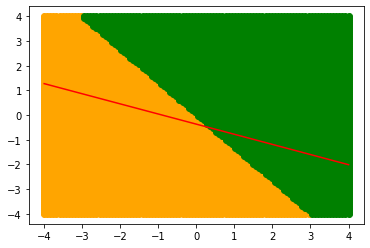

In [73]:
# 2-D Grid for neta = 0.01

x1=[]
x2=[]
y1=[]
y2=[]
z1=np.linspace(-4,4,100)
z2=np.linspace(-4,4,100)
for i in range(len(z1)):
  for j in range(len(z2)):
    z = [z1[i],z2[j]]
    cost = sigma(np.dot(w1[0:2],z))
    if(cost>=0):
      x1.append(z[0])
      y1.append(z[1])
    else:
      x2.append(z[0])
      y2.append(z[1])

x = np.linspace(-4,4,100)
d0 = w_final[2]
d1 = w_final[0]
d2 = w_final[1]
y = (-1)*(d0/d2) - (d1/d2)*x

plt.plot(x, y, '-r')
plt.scatter(x1, y1, color = 'orange')
plt.scatter(x2, y2, color = 'green')

# Observations : 

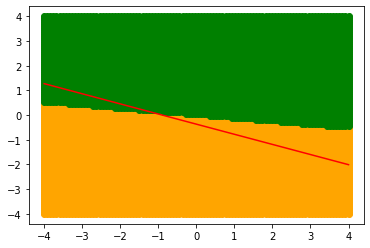

In [74]:
# 2-D Grid for neta = 0.001

x1=[]
x2=[]
y1=[]
y2=[]
z1=np.linspace(-4,4,100)
z2=np.linspace(-4,4,100)
for i in range(len(z1)):
  for j in range(len(z2)):
    z = [z1[i],z2[j]]
    cost = sigma(np.dot(w2[0:2],z))
    if(cost>=0):
      x1.append(z[0])
      y1.append(z[1])
    else:
      x2.append(z[0])
      y2.append(z[1])

x = np.linspace(-4,4,100)
d0 = w_final[2]
d1 = w_final[0]
d2 = w_final[1]
y = (-1)*(d0/d2) - (d1/d2)*x

plt.plot(x, y, '-r')
plt.scatter(x1, y1, color = 'orange')
plt.scatter(x2, y2, color = 'green')

# Observations : 

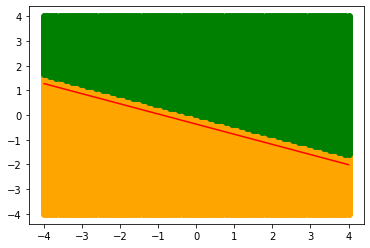

In [75]:
# 2-D Grid for neta = 0.001

x1=[]
x2=[]
y1=[]
y2=[]
z1=np.linspace(-4,4,100)
z2=np.linspace(-4,4,100)
for i in range(len(z1)):
  for j in range(len(z2)):
    z = [z1[i],z2[j]]
    cost = sigma(np.dot(w3[0:2],z))
    if(cost>=0):
      x1.append(z[0])
      y1.append(z[1])
    else:
      x2.append(z[0])
      y2.append(z[1])

x = np.linspace(-4,4,100)
d0 = w_final[2]
d1 = w_final[0]
d2 = w_final[1]
y = (-1)*(d0/d2) - (d1/d2)*x

plt.plot(x, y, '-r')
plt.scatter(x1, y1, color = 'orange')
plt.scatter(x2, y2, color = 'green')

# Observations : 

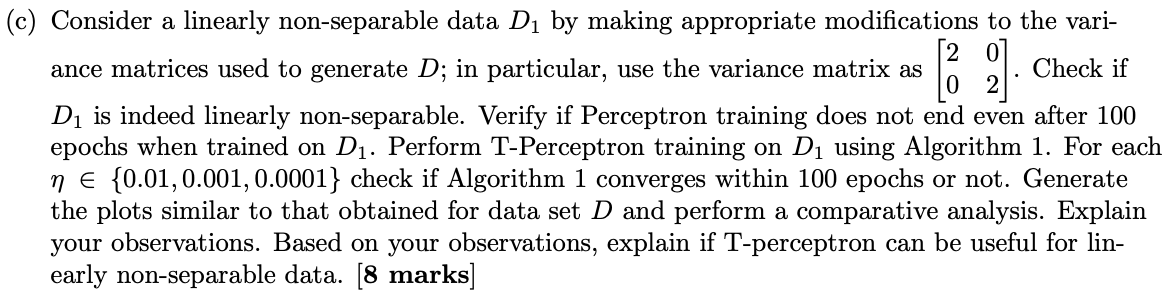

In [78]:
#Generate D1_1
mean = [-2,-2] # mean of the gaussian distribution
cov = [[2,0], [0,2]] # covariance matrix
size = 100 # number of 2 dimensional points 

D1_1 = np.random.multivariate_normal(mean, cov, size) # Input generation

y1_1 = np.full((100,1),1) # Class = +1

D1_1 = np.concatenate((D1_1,y1_1),1) # Augment

In [79]:
#Generate D1_2
mean = [1,1] # mean of the gaussian distribution
cov = [[2,0], [0,2]] # covariance matrix
size = 100 # number of 2 dimensional points 

D1_2 = np.random.multivariate_normal(mean, cov, size) # Input generation

y1_2 = np.full((100,1),-1) # Class = -1

D1_2 = np.concatenate((D1_2,y1_2),1) # Augment

In [80]:
#Construct D1 and shuffle.
D1 = np.concatenate((D1_1,D1_2), axis = 0)
np.random.shuffle(D1)

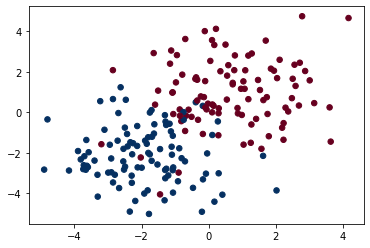

In [ ]:
plot_data(D1) 
# Observation : D1 is not linearly separable

Results for the perceptron

In [81]:
# Training the perceptron on the linear non-separable data
w_final_1, l_1 = train_perceptron(D1)

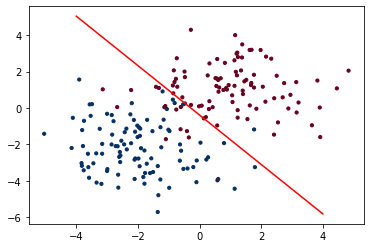

In [84]:
# Plotting the data with the final hyperplane obtained
plot_data_with_separator(D1, w_final_1)

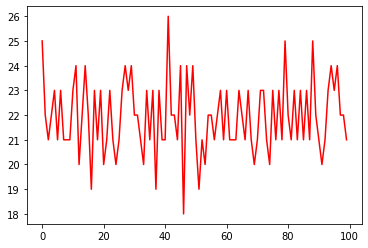

In [85]:
# Plotting the number of mistakes v/s epochs 
plot_mistakes_vs_epochs(l_1)
# Perceptron training does not end even after 100 epochs. We can also note that the perceptron is not always learning i.e. the slope of the obtained plot is not always -ve.
# This can be intuitively understood from the aggressive update rule of the perceptron and the dataset being linearly non-separable

Results for the T-Perceptron using different values for η = {0.01, 0.001, 0.0001}


In [87]:
# Training the T-perceptron using different values of η 

# For η = 0.01
w1_1, l1_1 = train_T_perceptron(D1, 0.01)
# For η = 0.001
w2_1, l2_1 = train_T_perceptron(D1, 0.001)
# For η = 0.0001
w3_1, l3_1 = train_T_perceptron(D1, 0.0001)

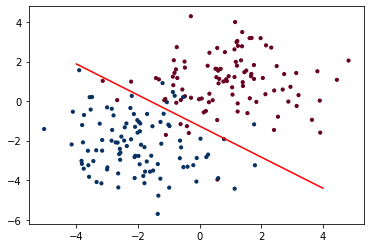

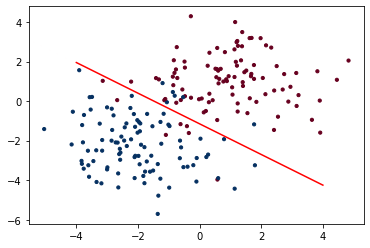

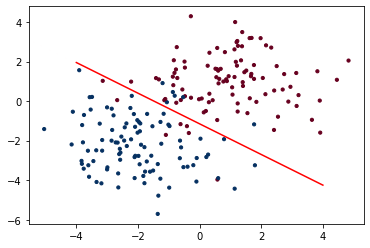

In [88]:
# Plotting the data with the final hyperplane obtained for different values of η

# For η = 0.01
plot_data_with_separator(D1, w1_1)
# For η = 0.001
plot_data_with_separator(D1, w2_1)
# For η = 0.0001
plot_data_with_separator(D1, w2_1)

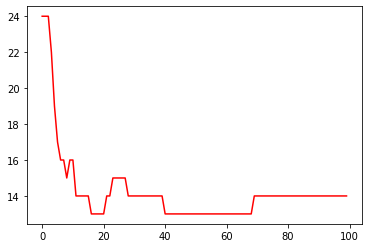

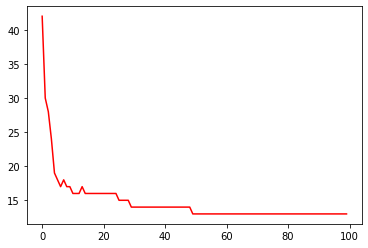

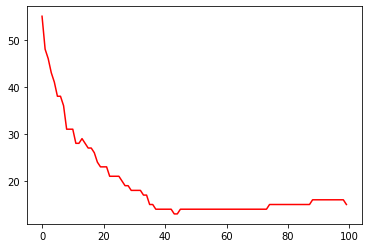

In [89]:
# Plotting the number of mistakes v/s epochs for different values of η

# For η = 0.01
plot_mistakes_vs_epochs(l1_1)

# For η = 0.001
plot_mistakes_vs_epochs(l2_1)

# For η = 0.0001
plot_mistakes_vs_epochs(l3_1)

# Even after 100 epochs, all the 3 T-perceptrons are unable to converge. However, on an average it can be noticed that they are "learning" with some amount of disturbanes every now and then. These, disturbances are more in case of η = 0.01 and least in case of η = 0.0001.

For comparative analysis:-

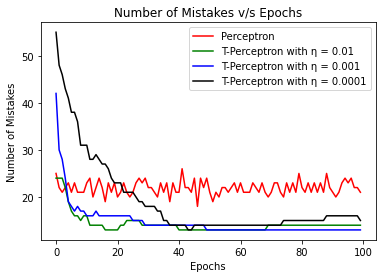

In [90]:
plt.figure()

x=[]
y=[]
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]

for i in range(len(l_1)):
  z = l_1[i]
  x.append(z[0])
  y.append(z[1])

for i in range(len(l1_1)):
  z1 = l1_1[i]
  x1.append(z1[0])
  y1.append(z1[1])

for i in range(len(l2_1)):
  z2 = l2_1[i]
  x2.append(z2[0])
  y2.append(z2[1])

for i in range(len(l3_1)):
  z3= l3_1[i]
  x3.append(z3[0])
  y3.append(z3[1])

plt.plot(x, y, '-r', label='Perceptron')
plt.plot(x1, y1, '-g', label='T-Perceptron with η = 0.01')
plt.plot(x2, y2, '-b', label='T-Perceptron with η = 0.001')
plt.plot(x3, y3, 'black', label='T-Perceptron with η = 0.0001')

plt.xlabel("Epochs")
plt.ylabel("Number of Mistakes")
plt.title("Number of Mistakes v/s Epochs")
  
plt.legend()
  
plt.show()

# From the following plot, we can observe two different things:-
# (1) Perceptron does not always "learn" and is hence vulnerable to committing more mistakes than it was committing before due to it's aggressive update rule
# (2) T-Perceptron has a more passive update rule due to which it keeps on "learning" but this rate of learning is often slow which is evident from the number of epochs that is being required by it to converge